In [1]:
# Nhập thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

import warnings
warnings.filterwarnings('ignore')

# Đọc bộ dữ liệu
corpus = pd.read_csv('data/cleaned_mhc.csv')

# Chuẩn bị dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    corpus['text'],
    corpus['label'],
    test_size=0.2,
    random_state=42
)

tfidf = TfidfVectorizer(max_features=3500)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

n_components = 100

lsa = TruncatedSVD(n_components=n_components, random_state=42)
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

print(f"TF-IDF - Train shape: {X_train_tfidf.shape}, Test Shape: {X_test_tfidf.shape}")
print(f"LSA - Train shape: {X_train_lsa.shape}, Test Shape: {X_test_lsa.shape}")

TF-IDF - Train shape: (18592, 3500), Test Shape: (4648, 3500)
LSA - Train shape: (18592, 100), Test Shape: (4648, 100)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import time
import pandas as pd

# Define parameter grids
n_estimators_grid = [50, 100]
max_depth_grid = [10, 50, 100, None]

# Other fixed parameters
min_samples_split = 5
min_samples_leaf = 10
max_features = 'log2'
bootstrap = True
random_state = 42

# Initialize a list to collect results
results = []

# Iterate through all combinations of n_estimators and max_depth
for n_estimators in n_estimators_grid:
    for max_depth in max_depth_grid:
        # Initialize RandomForestClassifier for TF-IDF
        rf_tfidf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            bootstrap=bootstrap,
            random_state=random_state
        )

        # Train and test the TF-IDF model
        start_fit = time.time()
        rf_tfidf.fit(X_train_tfidf, y_train)
        fit_time = time.time() - start_fit

        start_test = time.time()
        y_train_pred = rf_tfidf.predict(X_train_tfidf)
        y_test_pred = rf_tfidf.predict(X_test_tfidf)
        test_time = time.time() - start_test

        # Collect metrics for TF-IDF
        results.append({
            'Model': 'TF-IDF',
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'Train Accuracy': accuracy_score(y_train, y_train_pred),
            'Test Accuracy': accuracy_score(y_test, y_test_pred),
            'F1 Score': f1_score(y_test, y_test_pred),
            'Precision': precision_score(y_test, y_test_pred),
            'Recall': recall_score(y_test, y_test_pred),
            'Fit Time (s)': fit_time,
            'Test Time (s)': test_time,
            'Confusion Matrix': confusion_matrix(y_test, y_test_pred)
        })

        # Initialize RandomForestClassifier for LSA
        rf_lsa = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            bootstrap=bootstrap,
            random_state=random_state
        )

        # Train and test the LSA model
        start_fit = time.time()
        rf_lsa.fit(X_train_lsa, y_train)
        fit_time = time.time() - start_fit

        start_test = time.time()
        y_train_pred = rf_lsa.predict(X_train_lsa)
        y_test_pred = rf_lsa.predict(X_test_lsa)
        test_time = time.time() - start_test

        # Collect metrics for LSA
        results.append({
            'Model': 'LSA',
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'Train Accuracy': accuracy_score(y_train, y_train_pred),
            'Test Accuracy': accuracy_score(y_test, y_test_pred),
            'F1 Score': f1_score(y_test, y_test_pred),
            'Precision': precision_score(y_test, y_test_pred),
            'Recall': recall_score(y_test, y_test_pred),
            'Fit Time (s)': fit_time,
            'Test Time (s)': test_time,
            'Confusion Matrix': confusion_matrix(y_test, y_test_pred)
        })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Separate TF-IDF and LSA results into different DataFrames
tfidf_results_df = results_df[results_df['Model'] == 'TF-IDF'].drop(columns='Model')
lsa_results_df = results_df[results_df['Model'] == 'LSA'].drop(columns='Model')

# Display the results
print("TF-IDF Results:")
print(tfidf_results_df)

print("\nLSA Results:")
print(lsa_results_df)

# Print Confusion Matrices for each combination
print("\nTF-IDF Confusion Matrices:")
for idx, row in tfidf_results_df.iterrows():
    print(f"(n_estimators={row['n_estimators']}, max_depth={row['max_depth']}) Confusion Matrix:")
    print(row['Confusion Matrix'])

print("\nLSA Confusion Matrices:")
for idx, row in lsa_results_df.iterrows():
    print(f"(n_estimators={row['n_estimators']}, max_depth={row['max_depth']}) Confusion Matrix:")
    print(row['Confusion Matrix'])


TF-IDF Results:
    n_estimators  max_depth  Train Accuracy  Test Accuracy  F1 Score  \
0             50       10.0        0.845740       0.836489  0.855183   
2             50       50.0        0.882100       0.867040  0.881200   
4             50      100.0        0.888124       0.872849  0.887149   
6             50        NaN        0.888716       0.873924  0.888040   
8            100       10.0        0.846493       0.844234  0.861832   
10           100       50.0        0.883875       0.870482  0.884097   
12           100      100.0        0.890975       0.875215  0.889228   
14           100        NaN        0.891674       0.875645  0.889610   

    Precision    Recall  Fit Time (s)  Test Time (s)  \
0    0.831419  0.880345      0.231863       0.100665   
2    0.863928  0.899176      0.439936       0.145410   
4    0.864211  0.911338      0.515768       0.166259   
6    0.865549  0.911730      0.489082       0.159322   
8    0.839093  0.885838      0.452916       0.175705   

In [29]:
import pandas as pd

# TF-IDF Results
tfidf_results = pd.DataFrame({
    "n_estimators": [50, 50, 50, 50, 100, 100, 100, 100],
    "max_depth": [10.0, 50.0, 100.0, None, 10.0, 50.0, 100.0, None],
    "Train Accuracy": [0.845740, 0.882100, 0.888124, 0.888716, 0.846493, 0.883875, 0.890975, 0.891674],
    "Test Accuracy": [0.836489, 0.867040, 0.872849, 0.873924, 0.844234, 0.870482, 0.875215, 0.875645],
    "F1 Score": [0.855183, 0.881200, 0.887149, 0.888040, 0.861832, 0.884097, 0.889228, 0.889610],
    "Precision": [0.831419, 0.863928, 0.864211, 0.865549, 0.839093, 0.868053, 0.866394, 0.866766],
    "Recall": [0.880345, 0.899176, 0.911338, 0.911730, 0.885838, 0.900745, 0.913299, 0.913692],
    "Fit Time (s)": [0.231863, 0.439936, 0.515768, 0.489082, 0.452916, 0.881719, 0.969671, 0.962556],
    "Test Time (s)": [0.100665, 0.145410, 0.166259, 0.159322, 0.175705, 0.286485, 0.288594, 0.286815],
})

# LSA Results
lsa_results = pd.DataFrame({
    "n_estimators": [50, 50, 50, 50, 100, 100, 100, 100],
    "max_depth": [10.0, 50.0, 100.0, None, 10.0, 50.0, 100.0, None],
    "Train Accuracy": [0.902431, 0.940835, 0.940835, 0.940835, 0.905228, 0.942072, 0.942072, 0.942072],
    "Test Accuracy": [0.863167, 0.870267, 0.870267, 0.870267, 0.865964, 0.873064, 0.873064, 0.873064],
    "F1 Score": [0.879225, 0.886119, 0.886119, 0.886119, 0.881581, 0.888721, 0.888721, 0.888721],
    "Precision": [0.852043, 0.854334, 0.854334, 0.854334, 0.855088, 0.855794, 0.855794, 0.855794],
    "Recall": [0.908199, 0.920361, 0.920361, 0.920361, 0.909769, 0.924284, 0.924284, 0.924284],
    "Fit Time (s)": [3.499347, 4.473274, 4.701653, 4.855935, 7.211609, 8.957520, 9.070494, 8.952130],
    "Test Time (s)": [0.072433, 0.114003, 0.103353, 0.114407, 0.146241, 0.207266, 0.209498, 0.203937],
})

# Renaming columns for both dataframes
tfidf_results.rename(columns={"n_estimators": "Trees", "max_depth": "Max Depth"}, inplace=True)
lsa_results.rename(columns={"n_estimators": "Trees", "max_depth": "Max Depth"}, inplace=True)

# Pivot and ensure all combinations are present
all_combinations = pd.MultiIndex.from_product(
    [tfidf_results["Trees"].unique(), tfidf_results["Max Depth"].unique()],
    names=["Trees", "Max Depth"]
)

# Fill NaN rows by mapping available data into the reindexed table
tfidf_table = tfidf_results.pivot_table(
    index=["Trees", "Max Depth"],
    aggfunc="mean"
).reindex(all_combinations, fill_value=None)

lsa_table = lsa_results.pivot_table(
    index=["Trees", "Max Depth"],
    aggfunc="mean"
).reindex(all_combinations, fill_value=None)

# Fill missing rows with available results
tfidf_table.update(tfidf_results.set_index(["Trees", "Max Depth"]))
lsa_table.update(lsa_results.set_index(["Trees", "Max Depth"]))

# Reordering columns as per the request
ordered_columns = [
    "Train Accuracy", "Test Accuracy", "F1 Score", "Precision", "Recall", "Fit Time (s)", "Test Time (s)"
]

# Display the tables with the desired column order
tfidf_table = tfidf_table[ordered_columns]
lsa_table = lsa_table[ordered_columns]

# Style tables with heatmap (optional, only for visualization)
tfidf_table_styled = tfidf_table.style.background_gradient(cmap="Reds").format(precision=3)
lsa_table_styled = lsa_table.style.background_gradient(cmap="Blues").format(precision=3)

# Display the styled tables
print("TF-IDF Results (Filled):")
display(tfidf_table_styled)

print("\nLSA Results (Filled):")
display(lsa_table_styled)


TF-IDF Results (Filled):



LSA Results (Filled):


In [3]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_tfidf.feature_importances_

# Get the feature names (terms) from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame to map feature names to their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order and get the top 15
top_15_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Print the top 15 features with their importance
print("\nTop 15 Important Features (Terms) for TF-IDF Random Forest Model:")
print(top_15_features)


Top 15 Important Features (Terms) for TF-IDF Random Forest Model:
      Feature  Importance
450      cant    0.034301
843       die    0.029449
3230      try    0.028468
1155  feeling    0.028281
672     could    0.026796
2023    movie    0.026280
140   anxiety    0.026032
2490  redflag    0.018722
1154     feel    0.018577
1454     help    0.017761
1559       im    0.015002
3231   trying    0.014919
3129  thought    0.014721
398    broken    0.014417
1321       go    0.014139


In [4]:
print("Random Forest TFIDF Hyperparameters:")
print(rf_tfidf.get_params())

print("\nRandom Forest LSA Hyperparameters:")
print(rf_lsa.get_params())

Random Forest TFIDF Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Random Forest LSA Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


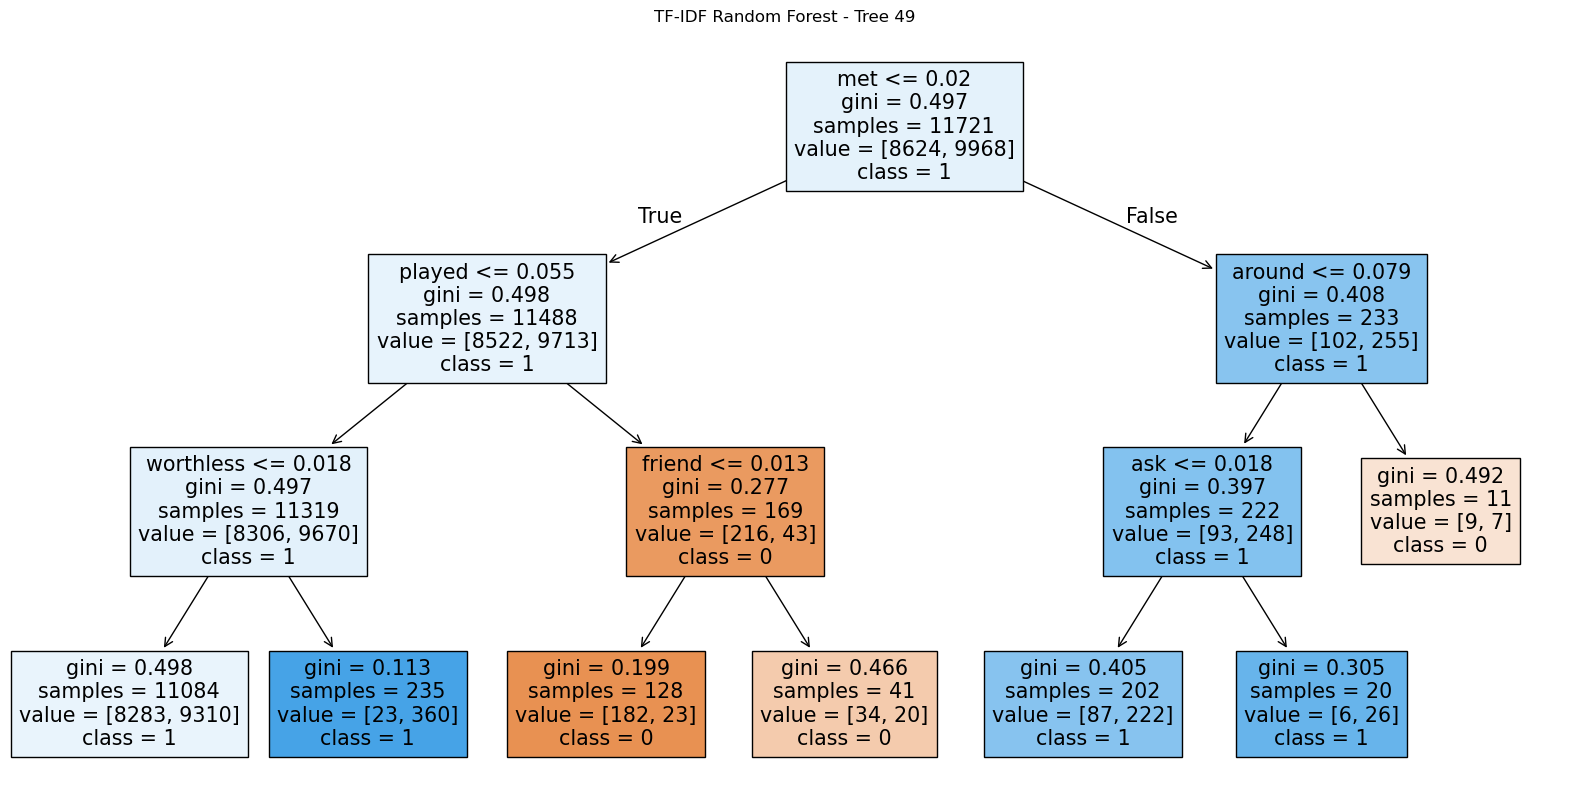

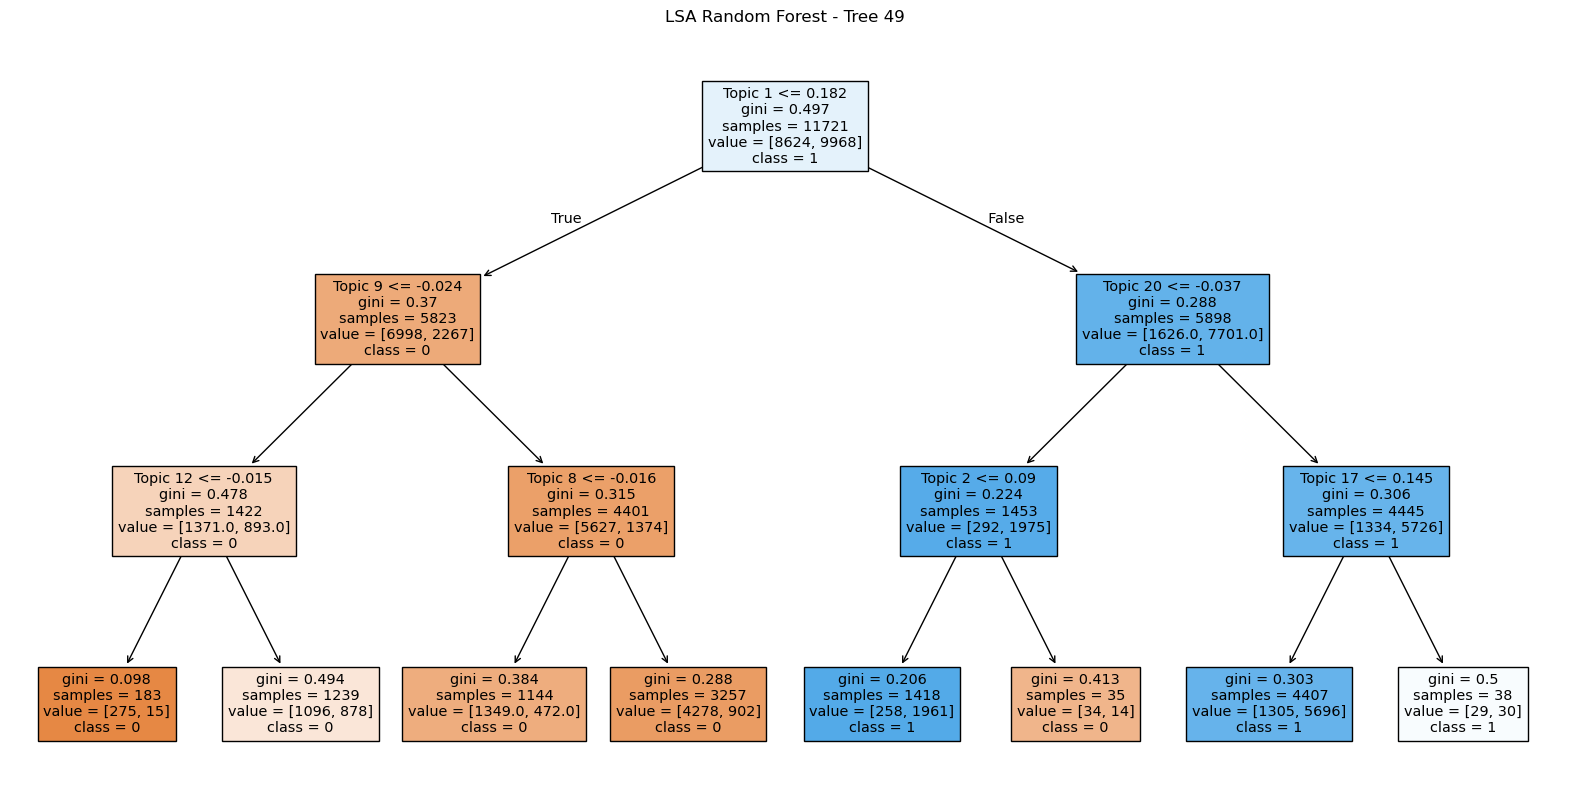

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tfidf_feature_names = tfidf.get_feature_names_out()  # Get feature names from the fitted TF-IDF vectorizer
lsa_feature_names = [f"Topic {i+1}" for i in range(X_train_lsa.shape[1])]  # Placeholder names for LSA topics

tree_id = 49

plt.figure(figsize=(20, 10))
plot_tree(rf_tfidf.estimators_[tree_id], filled=True, feature_names=tfidf_feature_names, class_names=['0', '1'])
plt.title(f"TF-IDF Random Forest - Tree {tree_id}")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(rf_lsa.estimators_[tree_id], filled=True, feature_names=lsa_feature_names, class_names=['0', '1'])
plt.title(f"LSA Random Forest - Tree {tree_id}")
plt.show()